## Лабораторная №1

Данные отсюда - https://www.kaggle.com/uciml/forest-cover-type-dataset

Было очень сложно описывать шаги и выводы на русском языке :(
Комментарии в коде писал на английском

Задачи:

0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор ближайших соседей (попробовать разное их количество)
8. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы

#### И так, стоит следующая цель: Построить модель, которая бы определяла основной тип деревьев, растущий на местности по некоторым признакам.

**Описание признаков**

1. Elevation = Высота.
2. Aspect = Направление наклона в градусах.
3. Slope = Наклон в градусах.
4. Horizontal_Distance_To_Hydrology = Горизонтальная истанция до ближайшего источника воды.
5. Vertical_Distance_To_Hydrology = Вертикальная дистанция до ближайшего источника воды.
6. Horizontal_Distance_To_Roadways = Горизонтальная дистанция до ближайшей дороги.
7. Hillshade_9am = Количество света в 9 часов утра.
8. Hillshade_Noon = Количество света в полдень.
9. Hillshade_3pm = Количество света в 3 часа дня.
10. Horizontal_Distance_To_Fire_Point = Расстояние до ближайшего очага огня.(Не совсем понял, для чего нужен это признак, но пусть будет)
11. Wilderness_Area1 = Rawah Wilderness Area
12. Wilderness_Area2 = Neota Wilderness Area
13. Wilderness_Area3 = Comanche Peak Wilderness Area
14. Wilderness_Area4 = Cache la Poudre Wilderness Area

**Soil_Type1 to Soil_Type40** - тип почвы

**Cover_Type - типы деревьев, которые растут в данной местности. Значения от 1 до 7. Целевая переменная.**
1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

In [0]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline 

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [0]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 1000)

#Read data for analysis
data = pd.read_csv('covtype.csv')

FileNotFoundError: ignored

**Для начала давайте посмотрим на наши данные**

In [0]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [0]:
print('Data Dimension:')
print('Number of Records:', data.shape[0])
print('Number of Features:', data.shape[1])

Data Dimension:
Number of Records: 581012
Number of Features: 55


In [0]:
#Names of columns
print('Feature Names')
print(data.columns)

Feature Names
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39'

Судя по названиям, за нас уже сделали one-hot encoding для типов почвы.
Теперь посмотрим на типы наших данных.

In [0]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

1. **Из описания видно, что все данные у нас типа int64, что хорошо для анализа, меньше времени заниматься препроцессингом**
2. **Так же в датасете отсутствуют пропуски.**

In [0]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


**Теперь посмотрим распределение наших данных и стандартные статистики.**

In [0]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

**Выводы:**
1. Несколько признаков отклонения от нормального распределения, проверим это подробнее чуть позже.
2. Пропуски отсутствуют(что очень радует)
3. С Wilderness Area и Soil Type был произведен one-hot encoding, так что мне это делать уже не нужно.
4. Для получения качественных предсказаний нужно будет стандартизировать и нормализовать признаки.

В целом, все выглядит очень неплохо, можно приступать к классификации. Только сначала проверим подозрительные признаки на симметричность распределения.

**Skewness - Коэффицие́нт асимметри́и**
> величина, характеризующая асимметрию распределения данной случайной величины. 

In [0]:
print('Skewness of the below features:')
print(data.skew())

Skewness of the below features:
Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                           

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

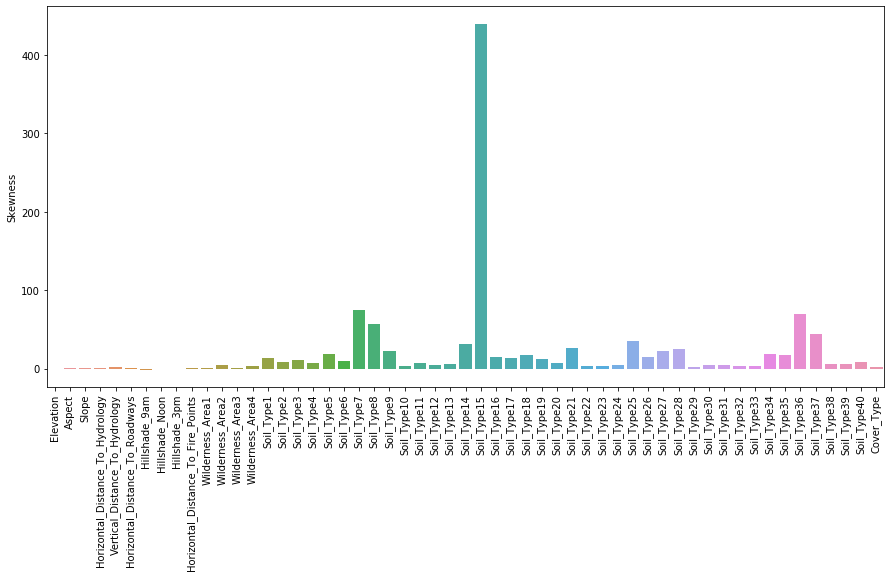

In [0]:
skew=data.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

**Выводы:**
> На графике видно, что с некоторыми перменными придется провести дополнительную предобработку, иначе они повлияют на результаты работы классификатора 

**Теперь проверим насколько сбалансированы классы**

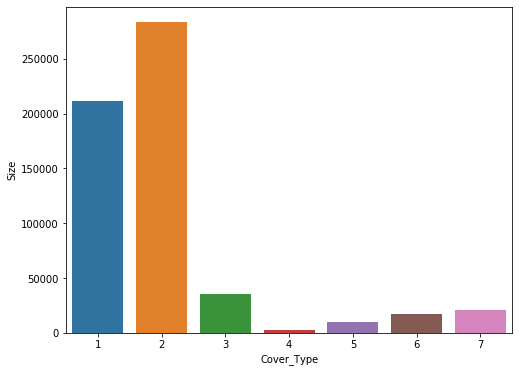

In [0]:
class_dist=data.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index,y='Size',data=class_label)

> Также стоит посчитать процентное соотношение

In [0]:
for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    print('Cover_Type',class_dist.index[i])
    print('%.2f'% percent,'%')

Cover_Type 1
36.46 %
Cover_Type 2
48.76 %
Cover_Type 3
6.15 %
Cover_Type 4
0.47 %
Cover_Type 5
1.63 %
Cover_Type 6
2.99 %
Cover_Type 7
3.53 %


**Выводы:**
1.  Cover_Type 1 и 2 - (**Spruce/Fir** and **Lodgepole Pine**) доминируют в данном регионе(и в датасете соответственно). 
2.  Так же Cover_Type 4 - (**Cottonwood/Willow**) находится в меньшинстве

> Далее я хочу построить графики и некоторые статистики по разным группам данных. Возможно, это поможет выявить что-то интересное:
* cont_data - небинарные признаки(как по-русски назвать continuous features?)
* binary_Data - бинарные признаки [Wilderness Areas + Soil Types]
* wilderness_Data и Soil_Data - Отдельно посмотрим на признаки, с которыми сделали one-hot encoding

In [0]:
cont_data=data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

binary_data=data.loc[:,'Wilderness_Area1':'Soil_Type40']

Wilderness_data=data.loc[:,'Wilderness_Area1': 'Wilderness_Area4']

Soil_data=data.loc[:,'Soil_Type1':'Soil_Type40']


**Посчитаем сколько значений относятся к каждому из бинарных групп:**

In [0]:
for col in binary_data:
    count=binary_data[col].value_counts()
    print(col,count)

Wilderness_Area1 0    320216
1    260796
Name: Wilderness_Area1, dtype: int64
Wilderness_Area2 0    551128
1     29884
Name: Wilderness_Area2, dtype: int64
Wilderness_Area3 0    327648
1    253364
Name: Wilderness_Area3, dtype: int64
Wilderness_Area4 0    544044
1     36968
Name: Wilderness_Area4, dtype: int64
Soil_Type1 0    577981
1      3031
Name: Soil_Type1, dtype: int64
Soil_Type2 0    573487
1      7525
Name: Soil_Type2, dtype: int64
Soil_Type3 0    576189
1      4823
Name: Soil_Type3, dtype: int64
Soil_Type4 0    568616
1     12396
Name: Soil_Type4, dtype: int64
Soil_Type5 0    579415
1      1597
Name: Soil_Type5, dtype: int64
Soil_Type6 0    574437
1      6575
Name: Soil_Type6, dtype: int64
Soil_Type7 0    580907
1       105
Name: Soil_Type7, dtype: int64
Soil_Type8 0    580833
1       179
Name: Soil_Type8, dtype: int64
Soil_Type9 0    579865
1      1147
Name: Soil_Type9, dtype: int64
Soil_Type10 0    548378
1     32634
Name: Soil_Type10, dtype: int64
Soil_Type11 0    568602
1 

**Выводы:**
* Можно видеть, что некоторые типы почвы присутствуют в очень незначительном количестве. Думаю, что можно смело удалять эти данные, это никак не повлияет на результаты классификации.
* Ниже будет список типов почвы меньше 1000

In [0]:
print('Soil Type',' Occurence_count')
for col in binary_data:
    count=binary_data[col].value_counts()[1]
    if count < 1000:
        print(col,count)

Soil Type  Occurence_count
Soil_Type7 105
Soil_Type8 179
Soil_Type14 599
Soil_Type15 3
Soil_Type21 838
Soil_Type25 474
Soil_Type28 946
Soil_Type36 119
Soil_Type37 298


### Далее построим несколько графиков с распределениями наших данных

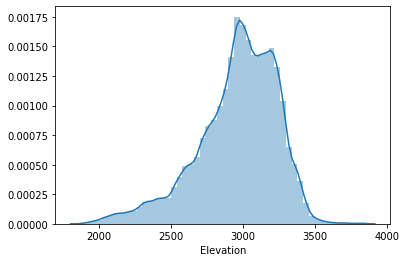

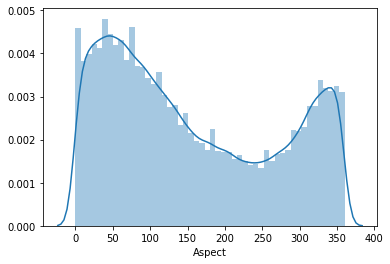

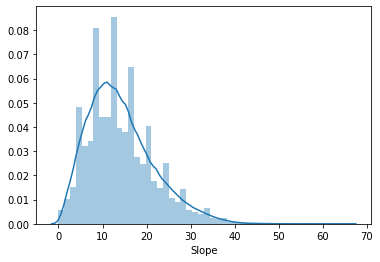

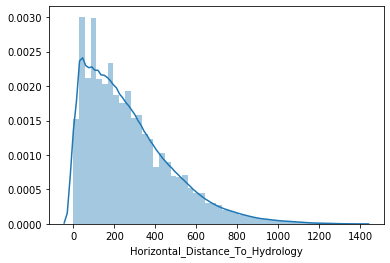

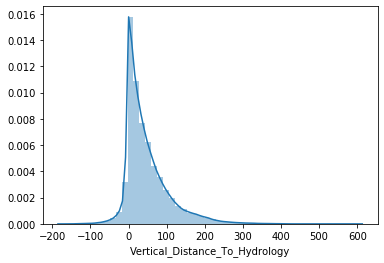

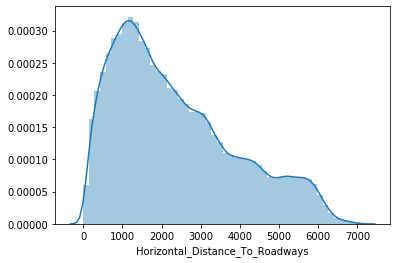

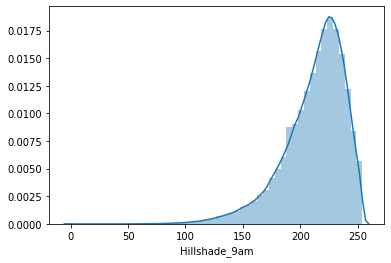

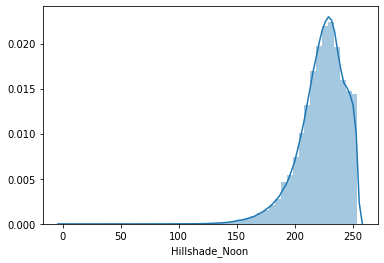

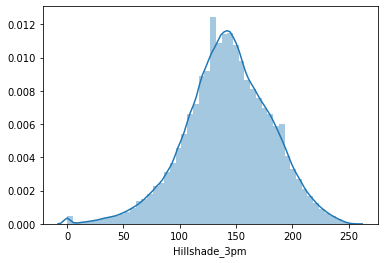

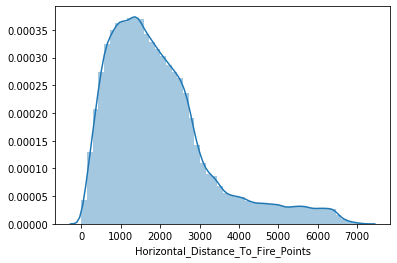

In [0]:
for i, col in enumerate(cont_data.columns):
    plt.figure(i)
    sns.distplot(cont_data[col])

* На графиках снова можно наблюдать ассиметричность распределений
* Далее я хочу проверить распределение данных относительно таргета

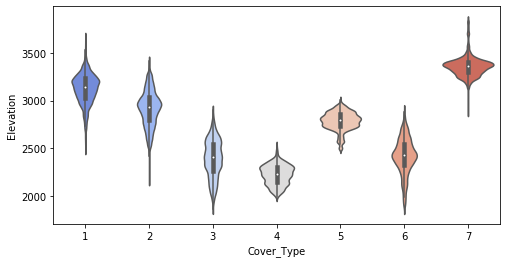

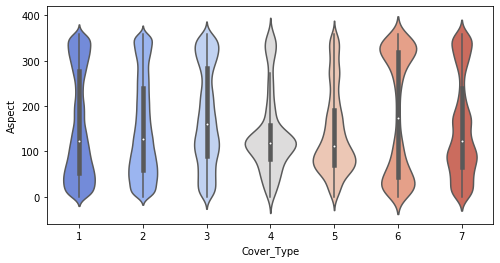

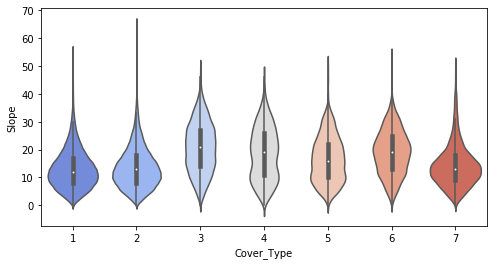

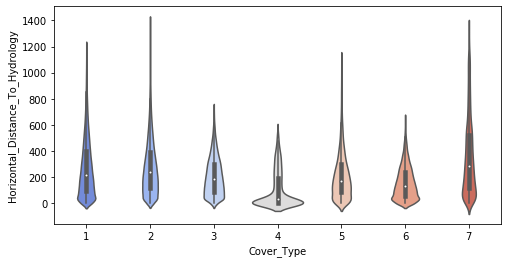

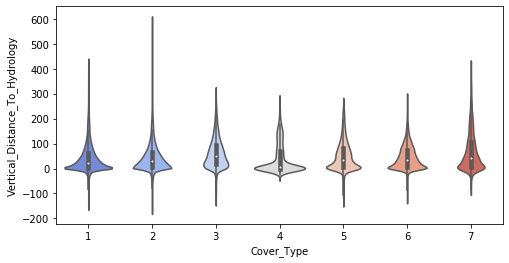

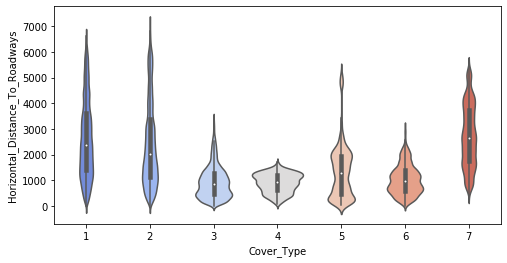

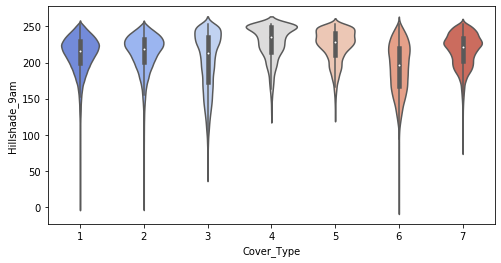

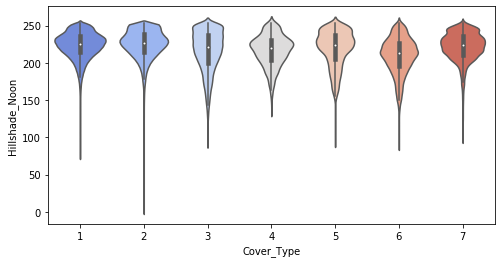

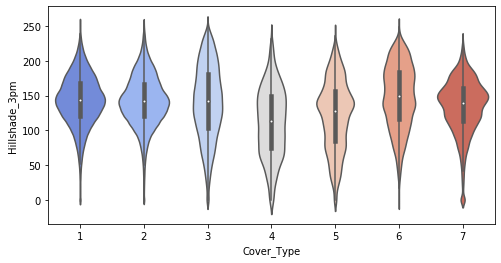

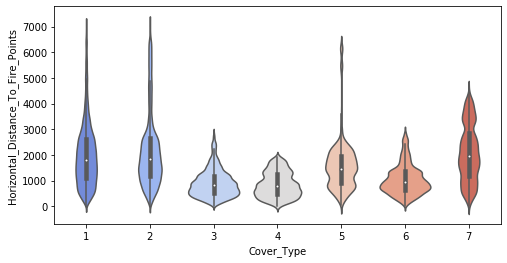

In [0]:
# %%time
data['Cover_Type']=data['Cover_Type'].astype('category')

for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.violinplot(x=data['Cover_Type'], y=col, data=data, palette="coolwarm")

*  Можно увидеть, что признаки - 'Elevation', 'slope' и 'horizontal distance' сильно различаются для разных таргетов

* А теперь построим такие же графики для бинарных признаков

CPU times: user 6.76 s, sys: 597 ms, total: 7.36 s
Wall time: 7.38 s


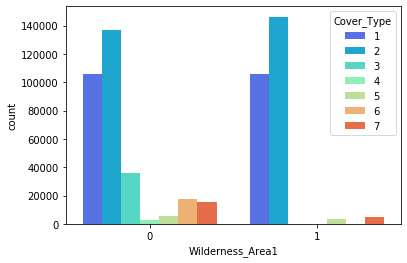

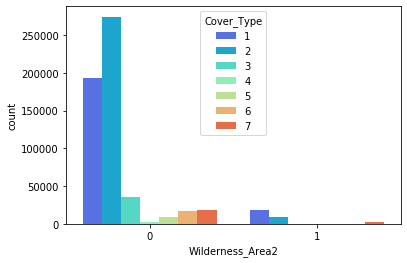

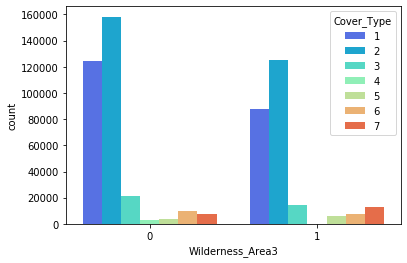

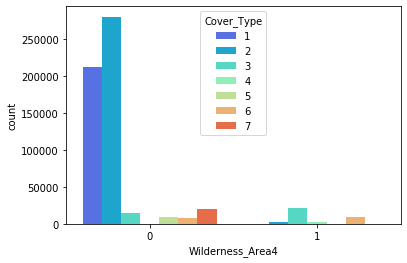

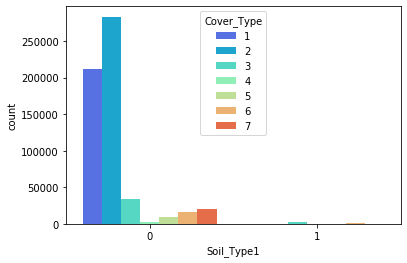

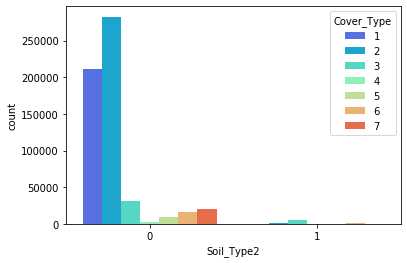

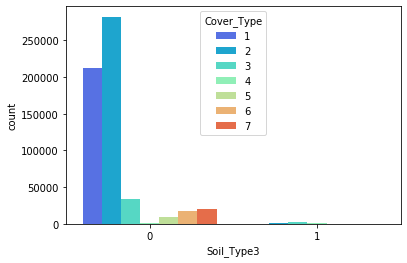

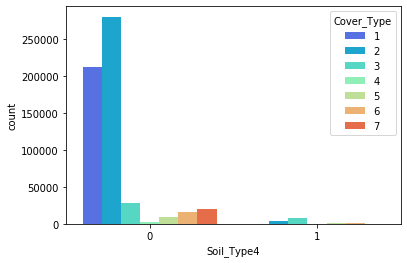

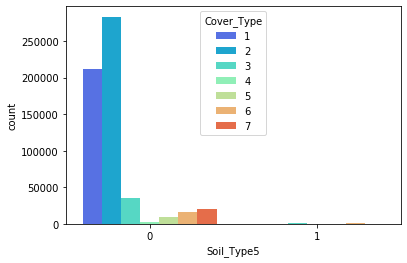

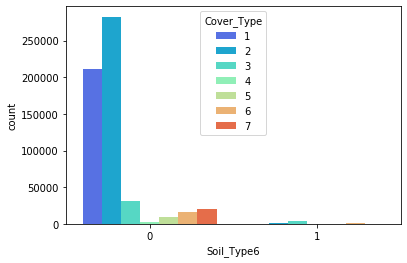

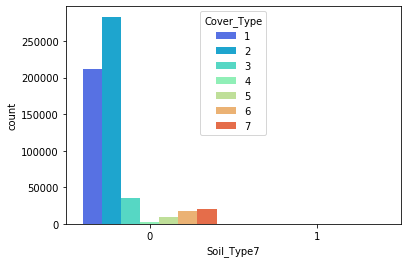

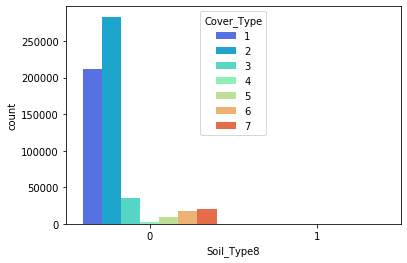

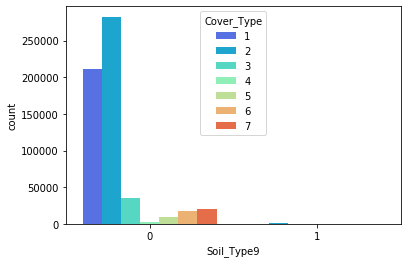

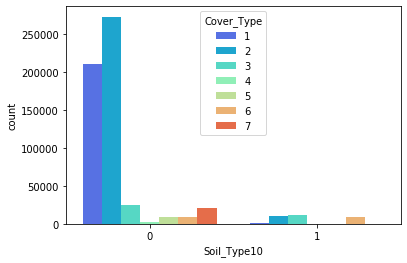

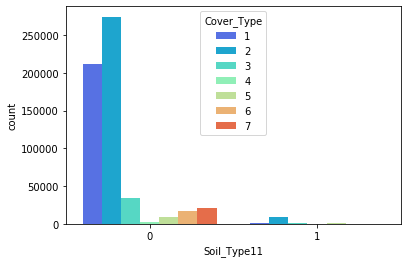

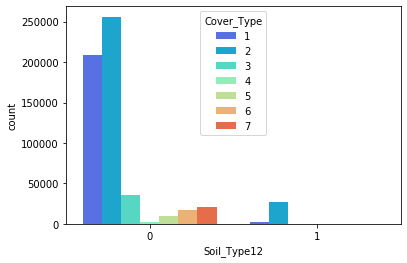

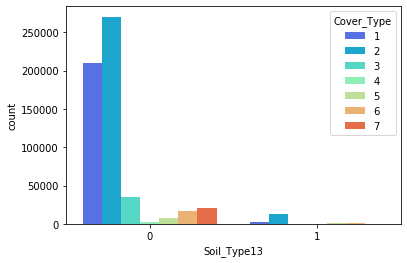

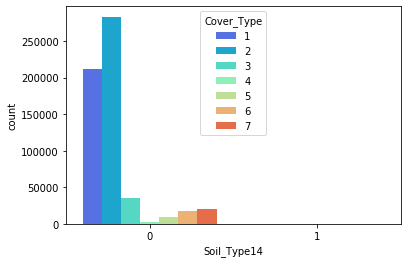

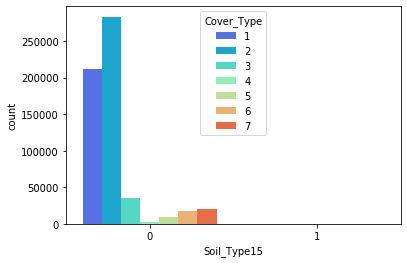

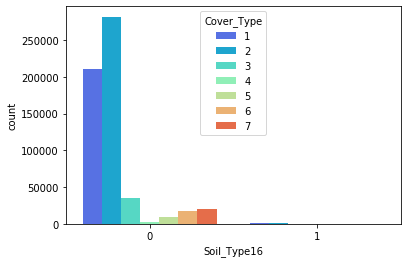

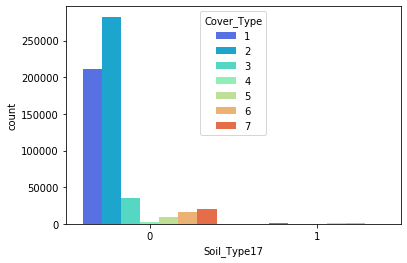

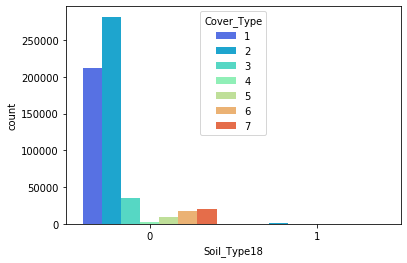

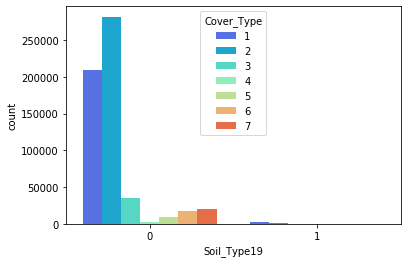

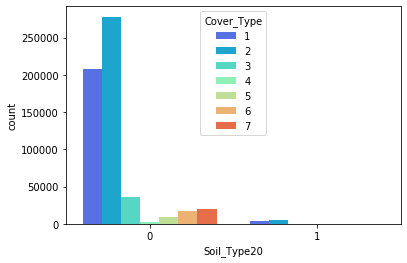

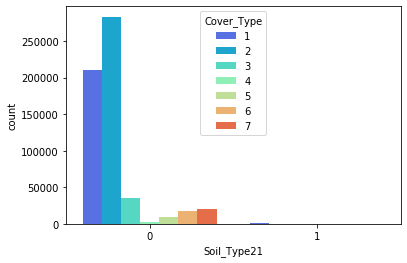

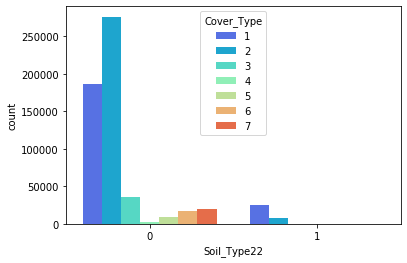

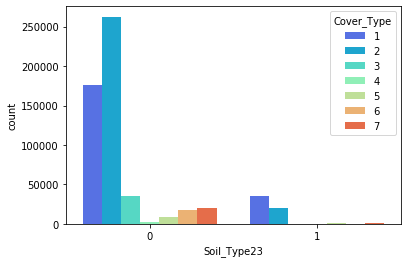

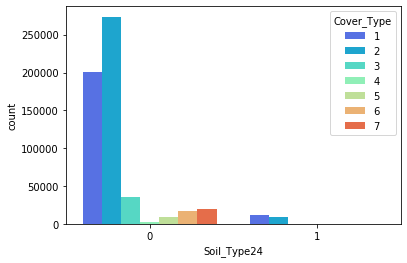

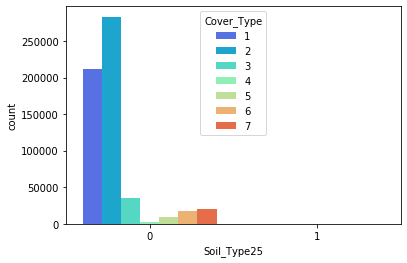

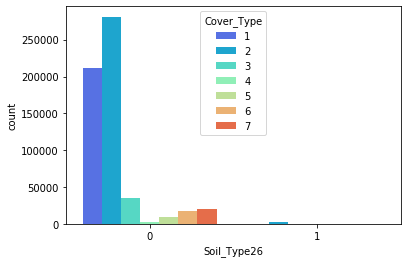

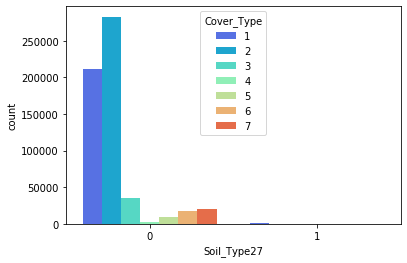

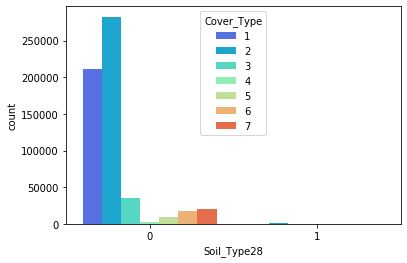

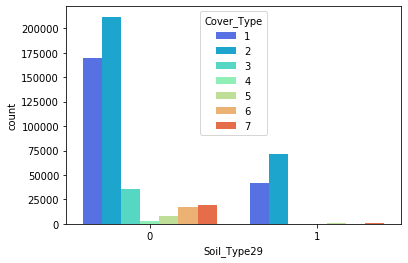

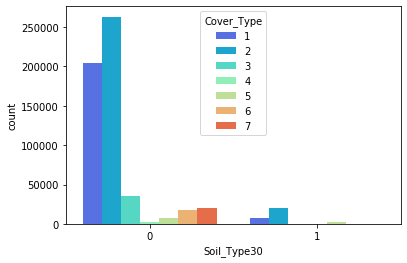

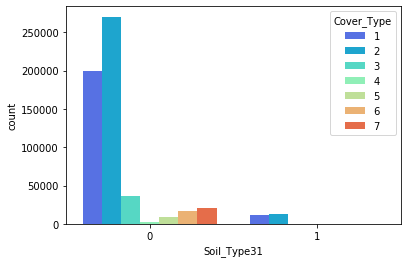

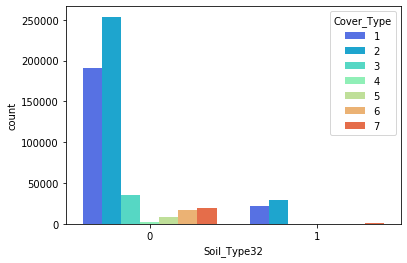

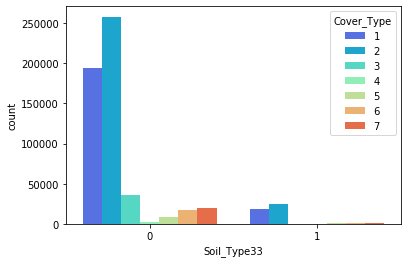

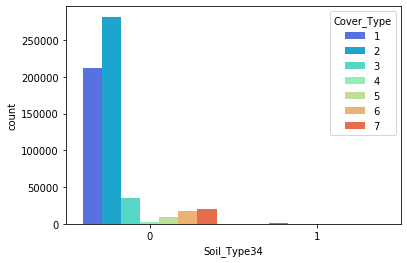

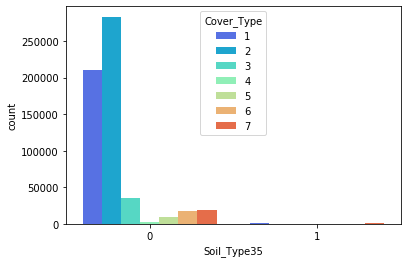

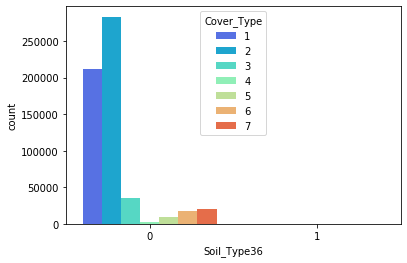

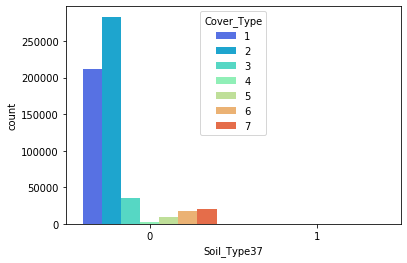

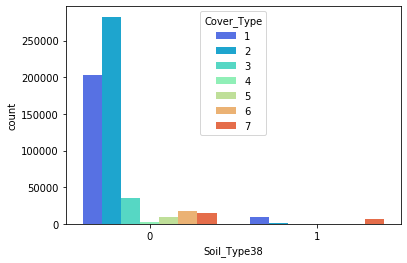

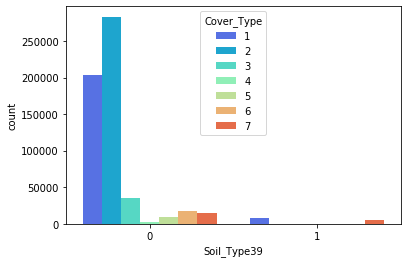

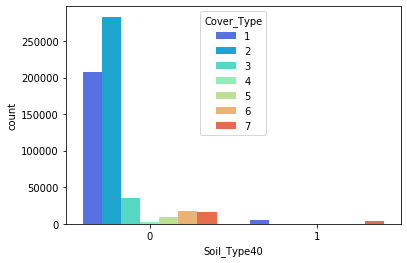

In [0]:
%%time
for i, col in enumerate(binary_data.columns):
    plt.figure(i,figsize=(6,4))
    sns.countplot(x=col, hue=data['Cover_Type'] ,data=data, palette="rainbow")

**Ну и наконец построим корреляционную матрицу**

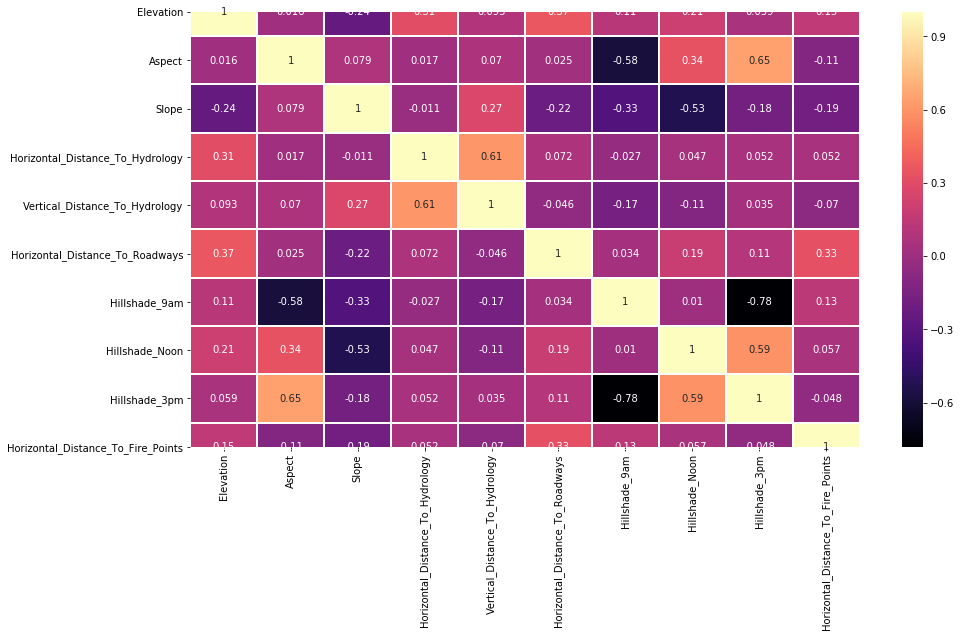

In [0]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

Можно видеть что у нескольких признаков сильная корреляция: 
>  Hillshade_9am ~ Hillshade_3pm и Aspect ~ Hillshade_3pm

**Выделим нашу целевую переменную в отдельный датафрейм**

* X = Признаки (Входные данные)
* y =  Целевая переменная (Класс)

In [0]:
X=data.loc[:,'Elevation':'Soil_Type40']
y=data['Cover_Type']

Теперь уберем некоторые переменные, которые могут помешать тренировке моделей. Обоснования смотреть выше.

In [0]:
rem = ['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']

In [0]:
X.drop(rem, axis=1, inplace=True)

### Разделим наши данные на обучующую и тестовую выборку

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

### Наконец, приступаем к обучению моделей.

Начнем с KNN с разным колличеством соседей(Спойлер: на данном датасете у этого алгоритма самая высокая точность)

In [0]:
%%time
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

CPU times: user 6min 23s, sys: 3.33 s, total: 6min 26s
Wall time: 2min 40s


> Визуализируем результаты для разного количества соседей

Text(0, 0.5, 'Accuracy')

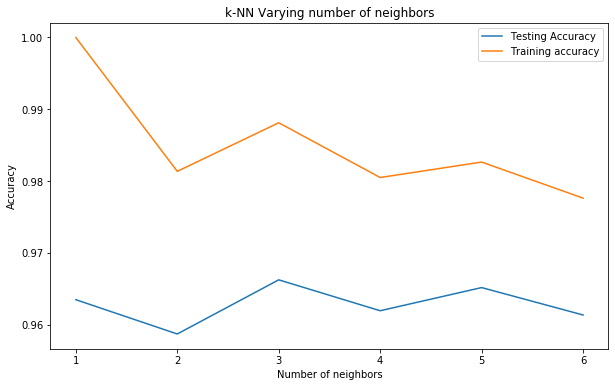

In [0]:
#Generate plot
plt.figure(figsize=(10,6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
#plt.show()

> При 3 соседях получается наиболее высокая точность

In [0]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

In [0]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
acc = knn.score(X_test,y_test)
print(f'KNN Accuracy: {acc}')

KNN Accuracy: 0.9662486230952818


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_test_predict = knn.predict(X_test)

print(confusion_matrix(y_test, y_test_predict))

print(classification_report(y_test, y_test_predict))

[[61191  1991     4     0    29     4   180]
 [ 1821 82742   122     2   197    93    16]
 [    1   124 10469    65    11   152     0]
 [    0     3   106   661     0    59     0]
 [   31   276    26     0  2531     6     0]
 [    6   129   188    25     5  4896     0]
 [  179    31     0     0     1     0  5931]]
              precision    recall  f1-score   support

           1       0.97      0.97      0.97     63399
           2       0.97      0.97      0.97     84993
           3       0.96      0.97      0.96     10822
           4       0.88      0.80      0.84       829
           5       0.91      0.88      0.90      2870
           6       0.94      0.93      0.94      5249
           7       0.97      0.97      0.97      6142

    accuracy                           0.97    174304
   macro avg       0.94      0.93      0.93    174304
weighted avg       0.97      0.97      0.97    174304



**Очень неплохой результат для такого простого алгоритма.**

### Теперь проверим другие классические алгоритмы для классификации и сравним точность

In [0]:
import scipy.stats as ss
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [0]:
%%time
MLA = []
Z = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , GaussianNB() ,RandomForestClassifier() , 
     GradientBoostingClassifier()]
algorithms = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "GaussianNB" ,"RandomForestClassifier" , 
     "GradientBoostingClassifier"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    MLA.append(accuracy_score(pred , y_test))

CPU times: user 19min 20s, sys: 19.7 s, total: 19min 39s
Wall time: 1h 2min 17s


In [0]:
d = { "Algorithm" : algorithms, "Accuracy" : MLA }

dfm = pd.DataFrame(d)
dfm

,Algorithm,Accuracy
0,LinearSVC,0.558782
1,DecisionTreeClassifier,0.936008
2,LogisticRegression,0.697322
3,GaussianNB,0.456685
4,RandomForestClassifier,0.943679
5,GradientBoostingClassifier,0.772788


Видно, что деревья неплохо себя показывают, но у KNN все еще самая высокая точность.

## Лабораторная №2

Для ваших данных применить PCA для сокращения размерности пространства признаков. Изобразить точки, сократив размерность пространства до 2. К новым данным применить классификатор, показавший наилучшие результаты в предыдущей лабе. По желанию, применить SVM. Построить графики зависимости ошибки на тестовой и обучающей выборки в зависимости от количества используемых компонент. Найти наилучшее значение количества используемых главных компонент. Позволяет ли PCA снизить ошибку? Сделать выводы. Решаем в том же ноутбуке.

In [0]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

Перед тем как применить PCA, проведем нормализацию данных. Нужно иметь ввиду, что мы не можем нормализовать весь датасет(train и test выборку), т.к. это приведет к утечке информации из test набора данных, а главный смысл использования test выборки - проверка обобщающей способности нашей модели.

Будем действовать следующим образом:
* Нормализуем train выборку и применим к ней PCA
* Нормализуем test выборку, используя mean и standard_deviation из train выборки
* Тренируем модель

In [0]:
data_for_pca = pd.read_csv('covtype.csv')
X=data_for_pca.loc[:,'Elevation':'Soil_Type40']
y=data_for_pca['Cover_Type']
rem = ['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']
X.drop(rem, axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [0]:
scaler = preprocessing.StandardScaler()

scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)
print(X_train_normalized)

[[-1.21328492  1.52196968 -1.21575589 ... -0.16606489 -0.15641708
  -0.12322246]
 [ 0.66694668 -0.68431193 -0.41394503 ... -0.16606489 -0.15641708
  -0.12322246]
 [ 0.17815782  1.03962471 -0.28030989 ... -0.16606489 -0.15641708
  -0.12322246]
 ...
 [ 0.69192129  1.17360942  0.38786583 ... -0.16606489 -0.15641708
  -0.12322246]
 [ 0.37795473  1.71848059  0.9224064  ... -0.16606489 -0.15641708
  -0.12322246]
 [ 0.22097144 -1.15772458  0.25423068 ... -0.16606489 -0.15641708
  -0.12322246]]


In [0]:
X_train = pd.DataFrame(X_train_normalized, columns = X_train.columns)
X_train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type26,Soil_Type27,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
0,-1.213285,1.521970,-1.215756,-0.985653,-0.709902,-0.962484,-0.229567,0.541278,-0.199579,1.108477,-0.233341,-0.878926,-0.261154,-0.07249,-0.114356,-0.091626,-0.147917,-0.052807,-0.106733,-0.044478,-0.244321,-0.147752,4.27624,-0.174848,-0.069642,-0.076609,-0.058073,-0.082327,-0.126673,-0.247559,-0.332478,-0.194561,-0.066357,-0.043325,-0.496930,-0.23395,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.166065,-0.156417,-0.123222
1,0.666947,-0.684312,-0.413945,-0.444373,0.182714,-0.831053,0.817019,-0.166989,-0.668463,1.108477,-0.233341,-0.878926,-0.261154,-0.07249,-0.114356,-0.091626,-0.147917,-0.052807,-0.106733,-0.044478,-0.244321,-0.147752,-0.23385,-0.174848,-0.069642,-0.076609,-0.058073,-0.082327,7.894338,-0.247559,-0.332478,-0.194561,-0.066357,-0.043325,-0.496930,-0.23395,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.166065,-0.156417,-0.123222
2,0.178158,1.039625,-0.280310,1.447756,-0.229263,2.016207,-0.864994,0.996592,-0.496589,1.108477,-0.233341,-0.878926,-0.261154,-0.07249,-0.114356,-0.091626,-0.147917,-0.052807,-0.106733,-0.044478,-0.244321,-0.147752,-0.23385,-0.174848,-0.069642,-0.076609,-0.058073,-0.082327,-0.126673,-0.247559,-0.332478,-0.194561,-0.066357,-0.043325,2.012356,-0.23395,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.166065,-0.156417,-0.123222
3,-0.289224,0.512618,1.590582,-0.952706,-0.194931,0.389659,-0.939750,1.502497,-0.500358,-0.902139,-0.233341,1.137752,-0.261154,-0.07249,-0.114356,-0.091626,-0.147917,-0.052807,-0.106733,-0.044478,-0.244321,-0.147752,-0.23385,5.719243,-0.069642,-0.076609,-0.058073,-0.082327,-0.126673,-0.247559,-0.332478,-0.194561,-0.066357,-0.043325,-0.496930,-0.23395,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.166065,-0.156417,-0.123222
4,0.745438,-1.068401,-1.082121,-0.364357,-0.349423,0.473647,0.293726,0.136554,1.807877,1.108477,-0.233341,-0.878926,-0.261154,-0.07249,-0.114356,-0.091626,-0.147917,-0.052807,-0.106733,-0.044478,-0.244321,-0.147752,-0.23385,-0.174848,-0.069642,-0.076609,-0.058073,-0.082327,-0.126673,-0.247559,3.007722,-0.194561,-0.066357,-0.043325,-0.496930,-0.23395,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.166065,-0.156417,-0.123222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406703,0.795388,-0.764703,-0.146675,0.435797,-0.109103,0.411458,0.817019,-0.470532,1.774708,1.108477,-0.233341,-0.878926,-0.261154,-0.07249,-0.114356,-0.091626,-0.147917,-0.052807,-0.106733,-0.044478,-0.244321,-0.147752,-0.23385,-0.174848,-0.069642,-0.076609,-0.058073,-0.082327,-0.126673,-0.247559,3.007722,-0.194561,-0.066357,-0.043325,-0.496930,-0.23395,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.166065,-0.156417,-0.123222
406704,0.759710,0.003476,1.991488,2.102000,4.199487,-0.766940,0.929153,0.237735,0.644713,1.108477,-0.233341,-0.878926,-0.261154,-0.07249,-0.114356,-0.091626,-0.147917,-0.052807,-0.106733,-0.044478,-0.244321,-0.147752,-0.23385,-0.174848,-0.069642,-0.076609,-0.058073,-0.082327,-0.126673,-0.247559,-0.332478,-0.194561,-0.066357,-0.043325,2.012356,-0.23395,-0.21506,-0.315741,-0.290186,-0.052643,-0.057667,-0.166065,-0.156417,-0.123222
406705,0.691921,1.173609,0.387866,0.308713,-0.091937,-0.674617,-1.537799,0.693049,0.047678,-0.902139,-0.233341,1.137752,-0.261154,-0.07249,-0.114356,-0.091626,-0.147917,-0.0

Отлично, теперь применим PCA. Попробуем задать количество главных компонент равным количеству наших признаков:

In [0]:
pca = PCA(n_components = 44)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=44, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Посмотрим, какие eigen values мы получаем:

In [0]:
print(pca.explained_variance_)

[3.68064606e+00 2.74893170e+00 1.99295115e+00 1.71331616e+00
 1.48738076e+00 1.45962050e+00 1.21226912e+00 1.16180988e+00
 1.09671155e+00 1.07955152e+00 1.07187097e+00 1.06480276e+00
 1.05175927e+00 1.03724011e+00 1.03577168e+00 1.02781545e+00
 1.02613471e+00 1.02237992e+00 1.01806644e+00 1.01589045e+00
 1.01275458e+00 1.01209126e+00 1.00878019e+00 1.00801050e+00
 1.00711993e+00 1.00621343e+00 1.00431284e+00 1.00414887e+00
 1.00379050e+00 1.00240813e+00 9.82051873e-01 8.72302453e-01
 8.16620307e-01 6.47860985e-01 6.46362943e-01 4.59902305e-01
 3.27974612e-01 3.25054867e-01 2.90847810e-01 2.52201448e-01
 1.57401460e-01 1.40372040e-01 6.60469478e-03 7.25879446e-31]


In [0]:
X_train_pca = pca.transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", X_train_pca.shape)

original shape:    (406708, 44)
transformed shape: (406708, 44)


In [0]:
X_test_pca = pca.transform(X_test)
print("original shape:   ", X_test.shape)
print("transformed shape:", X_test_pca.shape)

original shape:    (174304, 44)
transformed shape: (174304, 44)


Теперь попробуем подобрать оптимальное число PC для данного датасета. Для этого построим следующий график:

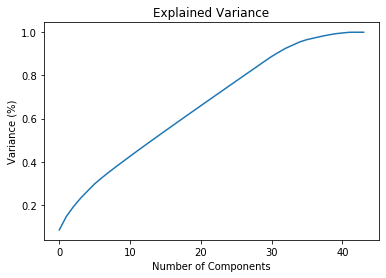

In [0]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

In [0]:
print(pca.explained_variance_ratio_.cumsum())

[0.08365084 0.14612641 0.19142064 0.23035955 0.26416357 0.29733669
 0.32488819 0.35129289 0.3762181  0.4007533  0.42511394 0.44931394
 0.4732175  0.49679109 0.52033129 0.54369068 0.56701186 0.59024771
 0.61338553 0.63647389 0.65949099 0.682493   0.70541977 0.72832904
 0.75121808 0.77408651 0.79691174 0.81973325 0.84254662 0.86532856
 0.88764787 0.90747288 0.92603238 0.94075646 0.95544649 0.96589879
 0.97335274 0.98074033 0.98735049 0.99308233 0.99665963 0.99984989
 1.         1.        ]


Можно сделать предварительный вывод, что оптимальное число PC достаточно велико - порядка **35**. Возможно, это из-за того, что мы на этапе препроцессинга убрали сильно коррелированные признаки, и теперь все данные вносят значимый вклад в предсказание.

### 2D визуализация и классификация

In [0]:
pca = PCA(n_components = 2)
pca.fit(X_train)
X_train_pca_2 = pca.transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", X_train_pca_2.shape)
X_test_pca_2 = pca.transform(X_test)
print("original shape:   ", X_test.shape)
print("transformed shape:", X_test_pca_2.shape)

original shape:    (406708, 44)
transformed shape: (406708, 2)
original shape:    (174304, 44)
transformed shape: (174304, 2)


In [0]:
principal_df = pd.DataFrame(data = X_train_pca_2
             , columns = ['principal component 1', 'principal component 2'])
final_df = pd.concat([principal_df, y_train], axis = 1)

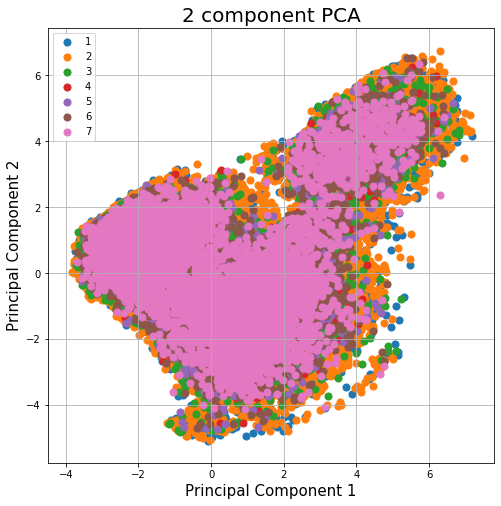

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(np.unique(y.values))
for target in targets:
    indicesToKeep = final_df['Cover_Type'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()

Теперь применим классификаторы к новым данным:

### KNN - лучший результат из лабораторной №1

In [0]:
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train_pca_2,y_train)
acc = knn.score(X_test_pca_2,y_test)
print(f'KNN Accuracy: {acc}')
y_test_predict = knn.predict(X_test_pca_2)


res = classification_report(y_test, y_test_predict)

print(res)

KNN Accuracy: 0.11606159353772719
              precision    recall  f1-score   support

           1       0.38      0.23      0.28     63556
           2       0.47      0.01      0.03     85078
           3       0.00      0.00      0.00     10638
           4       0.00      0.00      0.00       795
           5       0.00      0.00      0.00      2941
           6       0.00      0.00      0.00      5227
           7       0.03      0.76      0.07      6069

    accuracy                           0.12    174304
   macro avg       0.13      0.14      0.05    174304
weighted avg       0.37      0.12      0.12    174304



Видим, что knn совершенно не может выдавать точное предсказать на таком малом количестве признаков.

In [0]:
%%time
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train_pca_2, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_pca_2, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_pca_2, y_test) 

print(test_accuracy)

[0.11452405 0.1178401  0.11606159 0.10819029 0.15892923 0.157363  ]
CPU times: user 2min 41s, sys: 1.3 s, total: 2min 43s
Wall time: 1min 59s


Теперь попробуем обучить модель с использованием оптимального числа компонент(35):

In [0]:
pca = PCA(n_components = 35)
pca.fit(X_train)
X_train_pca_35 = pca.transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", X_train_pca.shape)
X_test_pca_35 = pca.transform(X_test)
print("original shape:   ", X_test.shape)
print("transformed shape:", X_test_pca_35.shape)

original shape:    (406708, 44)
transformed shape: (406708, 44)
original shape:    (174304, 44)
transformed shape: (174304, 35)


In [0]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train_pca_35,y_train)
acc = knn.score(X_test_pca_35,y_test)
print(f'KNN Accuracy: {acc}')
y_test_predict = knn.predict(X_test_pca_35)


res = classification_report(y_test, y_test_predict)

print(res)

KNN Accuracy: 0.14427092895171653
              precision    recall  f1-score   support

           1       0.14      0.00      0.00     63556
           2       0.58      0.24      0.34     85078
           3       0.00      0.00      0.00     10638
           4       0.00      0.00      0.00       795
           5       0.00      0.00      0.00      2941
           6       0.00      0.00      0.00      5227
           7       0.03      0.79      0.07      6069

    accuracy                           0.14    174304
   macro avg       0.11      0.15      0.06    174304
weighted avg       0.33      0.14      0.17    174304



### SVM

In [0]:
svm = LinearSVC()
svm.fit(X_train_pca_2,y_train)
acc = svm.score(X_test_pca_2,y_test)
print(f'svm Accuracy: {acc}')
y_test_predict = svm.predict(X_test_pca_2)


res = classification_report(y_test, y_test_predict)

print(res)

svm Accuracy: 0.36462731778960894
              precision    recall  f1-score   support

           1       0.36      1.00      0.53     63556
           2       0.00      0.00      0.00     85078
           3       0.00      0.00      0.00     10638
           4       0.00      0.00      0.00       795
           5       0.00      0.00      0.00      2941
           6       0.00      0.00      0.00      5227
           7       0.00      0.00      0.00      6069

    accuracy                           0.36    174304
   macro avg       0.05      0.14      0.08    174304
weighted avg       0.13      0.36      0.19    174304



Для 35 компонент:

In [0]:
svm = LinearSVC()
svm.fit(X_train_pca_35,y_train)
acc = svm.score(X_test_pca_35,y_test)
print(f'svm Accuracy: {acc}')
y_test_predict = svm.predict(X_test_pca_35)


res = classification_report(y_test, y_test_predict)

print(res)

svm Accuracy: 0.03481847806131816
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     63556
           2       0.00      0.00      0.00     85078
           3       0.00      0.00      0.00     10638
           4       0.00      0.00      0.00       795
           5       0.00      0.00      0.00      2941
           6       0.00      0.00      0.00      5227
           7       0.03      1.00      0.07      6069

    accuracy                           0.03    174304
   macro avg       0.00      0.14      0.01    174304
weighted avg       0.00      0.03      0.00    174304



### Выводы по лабораторной работе №2

Можно видеть на примере двух алгоритмов, показывающих хорошую точность(и другие метрики) на оригинальных данных, что попытка сократить размерность датасета с помощью PCA приводит к резкому снижению качества моделей.

Можно предположить, что для конкретно этой задачи имеет значение распределение исходных данных и любой препроцессинг приводит к тому, что алгоритмы перестают видеть взаимосвязи в информации. Так же становится сложнее интерпертировать итоговые результаты.

## Лабораторная №3

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Для начала, как всегда загрузим данные и сделаем разделение на обучающую и тестовую выборки.

In [0]:
data_for_pca = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covtype.csv')
X=data_for_pca.loc[:,'Elevation':'Soil_Type40']
y=data_for_pca['Cover_Type']
rem = ['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']
X.drop(rem, axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Проведем нормализацию данных.

In [0]:
scaler = preprocessing.StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(406708, 44)
(174304, 44)


#### Обучаем классификатор

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

In [0]:
print(f"Data shape: {X_train.shape}")
print(f"Labels: {y_train.shape}")

Data shape: (406708, 44)
Labels: (406708,)


Зададим параметры для поиска лучшей модели.

In [0]:
alphas = np.logspace(-3, 2, 20)
solver = "adam"
hidden_layer_sizes = (100, 25)

In [0]:
test_err = []
train_err = []
for alpha in tqdm(alphas):
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = hidden_layer_sizes, 
                              solver=solver, max_iter=40, early_stopping=True, activation = 'relu', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

100%|██████████| 20/20 [46:25<00:00, 74.17s/it]


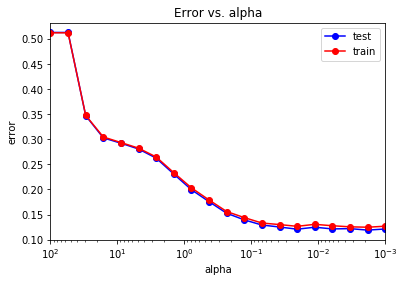

In [0]:
plt.semilogx(alphas, train_err, 'b-o', label = 'test')
plt.semilogx(alphas, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alphas), np.min(alphas)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [0]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.1189477462946389 0.12469593354139893


In [0]:
alpha_opt = alphas[test_err == min_test_err]
print(alpha_opt)

[0.00183298]


In [0]:
alpha_opt = alpha_opt[0]

#### Классификатор с оптимальными параметрами

In [0]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = hidden_layer_sizes, 
                              solver=solver, max_iter=300, early_stopping=True, activation = 'relu', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.10810212732476371
0.11441504497888746


#### Confusion matrix

In [0]:
print(confusion_matrix(y_test_pred, y_test))

[[56099  6582    10     0   112    23   499]
 [ 6892 77110   421     0   959   283    90]
 [    1   390  9346   160   121   859     0]
 [    0     0    65   581     0    39     0]
 [   52   378     6     0  1725     2     1]
 [   44   536   790    54    24  4021     0]
 [  468    82     0     0     0     0  5479]]


#### Classification metrics


In [0]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.89      0.88      0.88     63556
           2       0.90      0.91      0.90     85078
           3       0.86      0.88      0.87     10638
           4       0.85      0.73      0.79       795
           5       0.80      0.59      0.68      2941
           6       0.74      0.77      0.75      5227
           7       0.91      0.90      0.91      6069

    accuracy                           0.89    174304
   macro avg       0.85      0.81      0.82    174304
weighted avg       0.89      0.89      0.89    174304



### Применим PCA к данным и протестируем данный классификатор 

Вспомним с прошлой лабораторной работы, что оптимальное число компонент - 35

In [0]:
pca = PCA(n_components = 35)
pca.fit(X_train)
X_train_pca_35 = pca.transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", X_train_pca_35.shape)
X_test_pca_35 = pca.transform(X_test)
print("original shape:   ", X_test.shape)
print("transformed shape:", X_test_pca_35.shape)

original shape:    (406708, 44)
transformed shape: (406708, 35)
original shape:    (174304, 44)
transformed shape: (174304, 35)


Сразу возьмем оптимальную модель с подобранными параметрами, хотя не факт, что она сработает так же хорошо как на оригинальных данных. Вероятно, нужно будет использовать перебор еще раз.

In [0]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = hidden_layer_sizes, 
                              solver=solver, max_iter=300, early_stopping=True, activation = 'relu', random_state = 42)
mlp_model.fit(X_train_pca_35, y_train)

y_train_pred = mlp_model.predict(X_train_pca_35)
y_test_pred = mlp_model.predict(X_test_pca_35)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.14825870157459406
0.1517807967688636


In [0]:
print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test, y_test_pred))

[[51658  6542    22     0   121    35   766]
 [11219 77423   859     3  1574   748    85]
 [    4   323  8589   274    44  1075     0]
 [    0     2   127   461     0    59     0]
 [   34   236    31     0  1193     3     1]
 [   13   495  1010    57     9  3307     0]
 [  628    57     0     0     0     0  5217]]
              precision    recall  f1-score   support

           1       0.87      0.81      0.84     63556
           2       0.84      0.91      0.87     85078
           3       0.83      0.81      0.82     10638
           4       0.71      0.58      0.64       795
           5       0.80      0.41      0.54      2941
           6       0.68      0.63      0.65      5227
           7       0.88      0.86      0.87      6069

    accuracy                           0.85    174304
   macro avg       0.80      0.72      0.75    174304
weighted avg       0.85      0.85      0.85    174304



#### Предварительные выводы по PCA

В целом, результат предсказуемый - точность немного упала по сравнению с обучением на оригинальных данных.
Теперь попробуем запустить перебор с подбором оптимального alpha.

In [33]:
test_err_pca = []
train_err_pca = []
for alpha in tqdm(alphas):
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = hidden_layer_sizes, 
                              solver=solver, max_iter=100, early_stopping=True, activation = 'relu', random_state = 42)
    mlp_model.fit(X_train_pca_35, y_train)

    y_train_pred = mlp_model.predict(X_train_pca_35)
    y_test_pred = mlp_model.predict(X_test_pca_35)
    train_err_pca.append(np.mean(y_train != y_train_pred))
    test_err_pca.append(np.mean(y_test != y_test_pred))

100%|██████████| 20/20 [1:11:31<00:00, 71.42s/it]


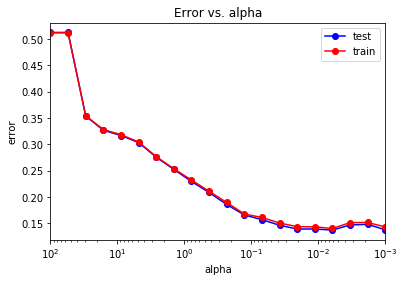

In [34]:
plt.semilogx(alphas, train_err_pca, 'b-o', label = 'test')
plt.semilogx(alphas, test_err_pca, 'r-o', label = 'train')
plt.xlim([np.max(alphas), np.min(alphas)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [35]:
min_train_err = np.min(train_err_pca)
min_test_err = np.min(test_err_pca)
print(min_train_err, min_test_err)

alpha_opt_pca = alphas[test_err_pca == min_test_err]
print(alpha_opt_pca)
alpha_opt_pca = alpha_opt_pca[0]

0.1372311338847527 0.1403180649899027
[0.00615848]


In [36]:
mlp_model = MLPClassifier(alpha = alpha_opt_pca, hidden_layer_sizes = hidden_layer_sizes, 
                              solver=solver, max_iter=300, early_stopping=True, activation = 'relu', random_state = 42)
mlp_model.fit(X_train_pca_35, y_train)

y_train_pred = mlp_model.predict(X_train_pca_35)
y_test_pred = mlp_model.predict(X_test_pca_35)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.1372311338847527
0.1403180649899027


In [37]:
print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test, y_test_pred))

[[53585  7298     2     0   214    25   742]
 [ 9375 76508   588     0  1279   480    90]
 [    4   469  9085   161    88  1172     0]
 [    0     1   112   583     0    51     0]
 [   44   322     8     0  1352     2     1]
 [   19   450   843    51     8  3497     0]
 [  529    30     0     0     0     0  5236]]
              precision    recall  f1-score   support

           1       0.87      0.84      0.85     63556
           2       0.87      0.90      0.88     85078
           3       0.83      0.85      0.84     10638
           4       0.78      0.73      0.76       795
           5       0.78      0.46      0.58      2941
           6       0.72      0.67      0.69      5227
           7       0.90      0.86      0.88      6069

    accuracy                           0.86    174304
   macro avg       0.82      0.76      0.78    174304
weighted avg       0.86      0.86      0.86    174304



### Выводы по работе MLP

В целом, нейросетевой подход в таком исполнении и на табличных данных не имеет большого смысла, разве что из академического интереса - классические алгоритмы справляются с классификацией лучше и обучаются быстрее.

В то же время, MLP гораздо лучше классических KNN и SVM проявляет себя при работе с данными после PCA - в этом и заключается основное преимущество нейронных сетей, искать сложные зависимости в слабо интерпретируемых данных. Но на данном датасете подобные манипуляции с данными имеют мало смысла, так как мы на начальном этапе выделили максимальное количество значимых фич, и из результатов работы всех алгоритмов видно, что искать взаимосвязи в оригинальных данных на этом датасете проще.